## **演示0501：函数极限值**

### **案例1：利用导函数求极值**
求函数$f(x)$的极值的步骤：

1. 计算其导函数$f'(x)$，然后令$f'(x)=0$，得出此时的解$x_0$
2. 计算导函数$f'(x)$在$x=x_0$处的导数(也就是$f(x)$的二阶导数）$f'' (x_0)$
 * 如果$f''(x_0) \gt 0$，则$x_0$为极小值点
 * 如果$f''(x_0) \lt 0$，则$x_0$为极大值点
 * 如果$f''(x_0) = 0$，则$x_0$为非极值点，而是拐点

>**示例1：利用导数计算$f(x)=x^2$的极值：**  
$ f'(x)=2x $，令$f'(x)=0$，得：$x_0=0 $  
$ f''(x_0)=2 $，因此$x_0=0$是极小值点  
极小值为$f(x_0 )=f(0)=0$

>**示例2：利用导数计算$f(x)=x^3$的极值：**  
$ f'(x)=3x^2$，令$f'(x)=0$，得：$x_0=0 $  
$ f''(x_0)=6x_0=0 $$，因此这个点不是极值点而是拐点    
可通过其图像看到这一点

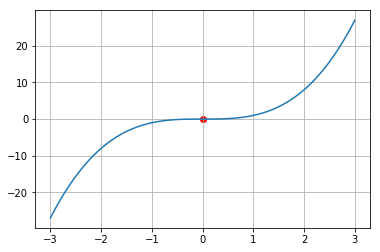

In [2]:
''' y=x**3函数曲线图像及拐点 '''

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3

x = np.linspace(-3, 3, 100)
y = f(x)
plt.grid()
plt.scatter(0, 0, color='r')
plt.plot(x, y)
plt.show()

### **案例2：使用数值方法计算$f(x)=x^2$极值**
选择一个初始点，然后计算该点的导数，再通过导数和步长推进到下一个点，直到两个点之间的差值很小为止  
* 该函数图像如下：  
![](../images/050101.png)
* 按照下列步骤执行：  
 1. 选定一个初始值，例如$x_0=2$
 2. 计算在该点的导数，$f'(x_0)=4$
 3. 按照下列公式调整$x$的新值：$x_1= x_0 - \alpha f'(x_0)$
   * $\alpha$称为步进系数(学习速率)，用来控制步长大小。例如设置为0.1, 0.001等
   * $f'(x_0)$主要用来控制步长的方向。在本例中是通过正负号来控制
   * 注意，要与导数的方向相反（所以用减号），否则将会离极值点越来越远
 4. 计算$f(x_1)$，并且与$f(x_0)$对比，根据某个规则来判断是否已经收敛，例如：二者的差值小于某个临界误差，例如0.000001。如果尚未收敛，则继续进行上述循环
 5. 如果在指定循环次数（例如1000次）之后仍然没有收敛，则可以认为该函数没有极值
* 说明
 * 上图中，从点(2,4)出发，将逐步逼近(0,0)。
 * 如果初始值取为负数，则导数也为负，根据$x_1= x_0-\alpha f'(x_0)$，$x_1 $将大于$x_0$，也就是向原点方向移动，这也是正确的。
 * 因此，通过$x_1= x_0-\alpha f'(x_0)$来不断逼近，是一种合适的方法
* 注意：如果函数本身有多个极值点，那么逼近法找到的是其中的一个，未必是最低的极值点：  
![](../images/050102.png)

> **步骤1：定义目标函数和一阶导数**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数
def f1(x): 
    return x * x

# 定义目标函数对应的一阶导函数
def f1_dir(x):
    return 2 * x

> **步骤2：定义使用数值方法逼近求极小值的函数并调用之**

In [4]:
# 存放数值方法依次逼近的各个极值点的坐标
temp_x = []
temp_y = []

# 数值逼近求极小值，需要传入目标函数、目标函数的一阶导数以及初始值
def minimize(fx, fx_dir, init_x, alpha = 0.1, difference = 1e-10, max_iter = 1000):
    current_x = init_x
    current_y = fx(current_x)
    for i in np.arange(max_iter):
        new_x = current_x - alpha * fx_dir(current_x)
        new_y = fx(new_x)
        temp_x.append(new_x)
        temp_y.append(new_y)
        if np.abs(new_y - current_y) <= difference:    # 已收敛
            return {"是否收敛":True, "极小点": new_x, "极小值": new_y, '循环次数': i+1}
        current_x = new_x
        current_y = new_y
    return {"是否收敛":False, "极小点": np.NaN, "极小值": np.NaN, '循环次数': max_iter}

# 计算y=x*x的极值
result = minimize(f1, f1_dir, 8.0)
print(result)

{'是否收敛': True, '极小点': 1.2259964326927117e-05, '极小值': 1.5030672529752548e-10, '循环次数': 60}


> **步骤3：绘制收敛过程图**  
绘制每个循环后求得的函数最小值，可以观察到最小值是如何逐渐稳定的

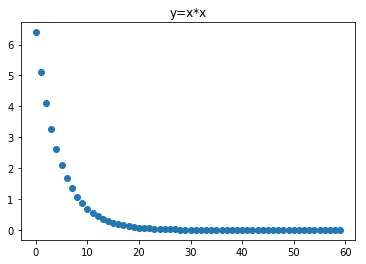

In [5]:
# 绘制数值方法求得的各个极值点
pt_x = np.arange(len(temp_x))
pt_y = temp_x
plt.figure()
plt.title('y=x*x')
plt.plot(pt_x, pt_y, 'o')
plt.show()